Found 1 studies.
Found 2 images.


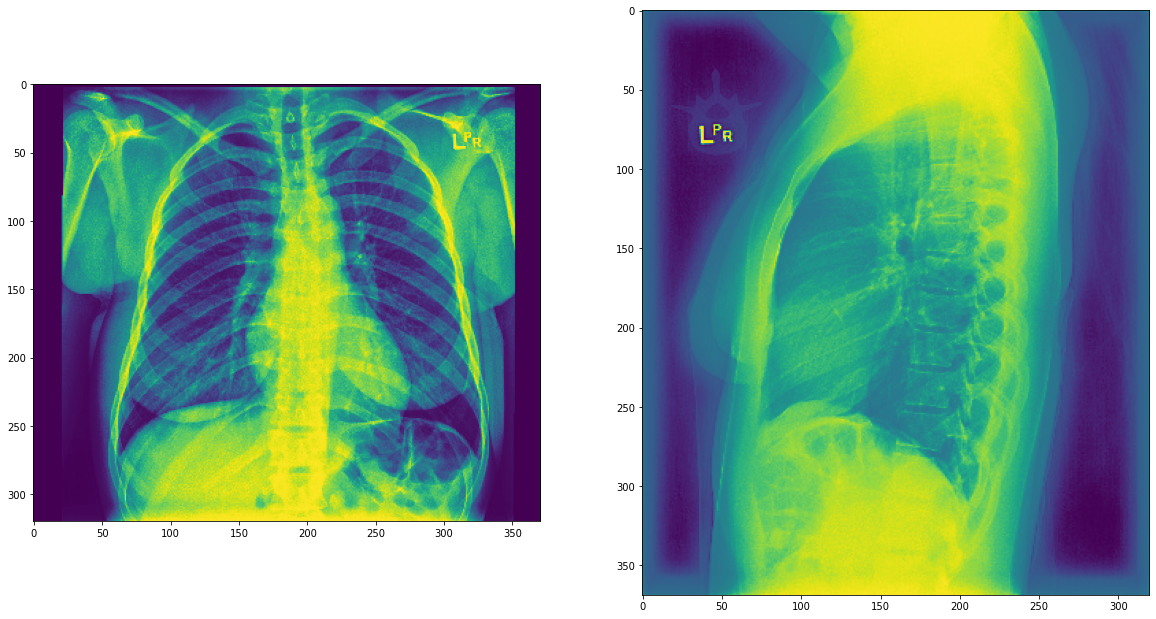

In [1]:
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


matplotlib.rcParams['figure.figsize'] = (20.0, 30.0)

base = Path("/scratch/ahm9968/chexpert-small/")
patient = base / "train/patient00004"
if not patient.exists():
    raise FileNotFoundError(patient)

studies = list(patient.iterdir())
print("Found {} studies.".format(len(studies)))

images = [[] for _ in range(len(studies))]
max_imgs = 0
total_imgs = 0
for i, s in enumerate(studies):
    imgs = s.iterdir()
    for img in imgs:
        if img.name.startswith('.'):
            continue
        images[i].append(mpimg.imread(img))
        total_imgs += 1
    max_imgs = max(max_imgs, len(images[i]))

print("Found {} images.".format(total_imgs))

if len(studies) == total_imgs:
    matplotlib.rcParams['figure.figsize'] = (10.0, 20.0)

_, axs = plt.subplots(len(studies), max_imgs)
if total_imgs == 1:
    axs.imshow(images[0][0])
elif len(studies) == 1:
    for j, img in enumerate(images[0]):
        axs[j].imshow(img)
elif len(studies) == total_imgs:
    for j, img in enumerate(images):
        axs[j].imshow(img[0])
else:
    for i, imgs in enumerate(images):
        for j, img in enumerate(imgs):
            axs[i, j].imshow(img)
        if len(imgs) < max_imgs:
            for k in range(len(imgs), max_imgs):
                axs[i, k].imshow(imgs[-1])

plt.show()

In [2]:
import pandas as pd

train = base / "train.csv"

df = pd.read_csv(train)
df

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223409,CheXpert-v1.0-small/train/patient64537/study2/...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,-1.0,0.0,1.0,NaN,NaN,NaN
223410,CheXpert-v1.0-small/train/patient64537/study1/...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,0.0,-1.0,NaN,-1.0,NaN,NaN,NaN
223411,CheXpert-v1.0-small/train/patient64538/study1/...,Female,0,Frontal,AP,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223412,CheXpert-v1.0-small/train/patient64539/study1/...,Female,0,Frontal,AP,NaN,NaN,1.0,1.0,NaN,NaN,NaN,-1.0,1.0,0.0,NaN,NaN,NaN,0.0


In [5]:
from chexpert_data import ChexpertDataset

data = ChexpertDataset(base, True)
data[0]

(tensor([[[0.0039, 0.0000, 0.1922,  ..., 0.0000, 0.0000, 0.0000],
          [0.0118, 0.0039, 0.1961,  ..., 0.0039, 0.0039, 0.0039],
          [0.0000, 0.0000, 0.1922,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.6157, 0.6549, 0.6980,  ..., 0.8863, 0.8980, 0.9333],
          [0.6471, 0.6745, 0.6431,  ..., 1.0000, 0.9176, 0.9412],
          [0.6902, 0.7765, 0.6392,  ..., 0.9608, 0.9098, 0.9020]]]),
 (tensor([1]), 68, tensor([1])))

(tensor([0]), 76, tensor([0]))

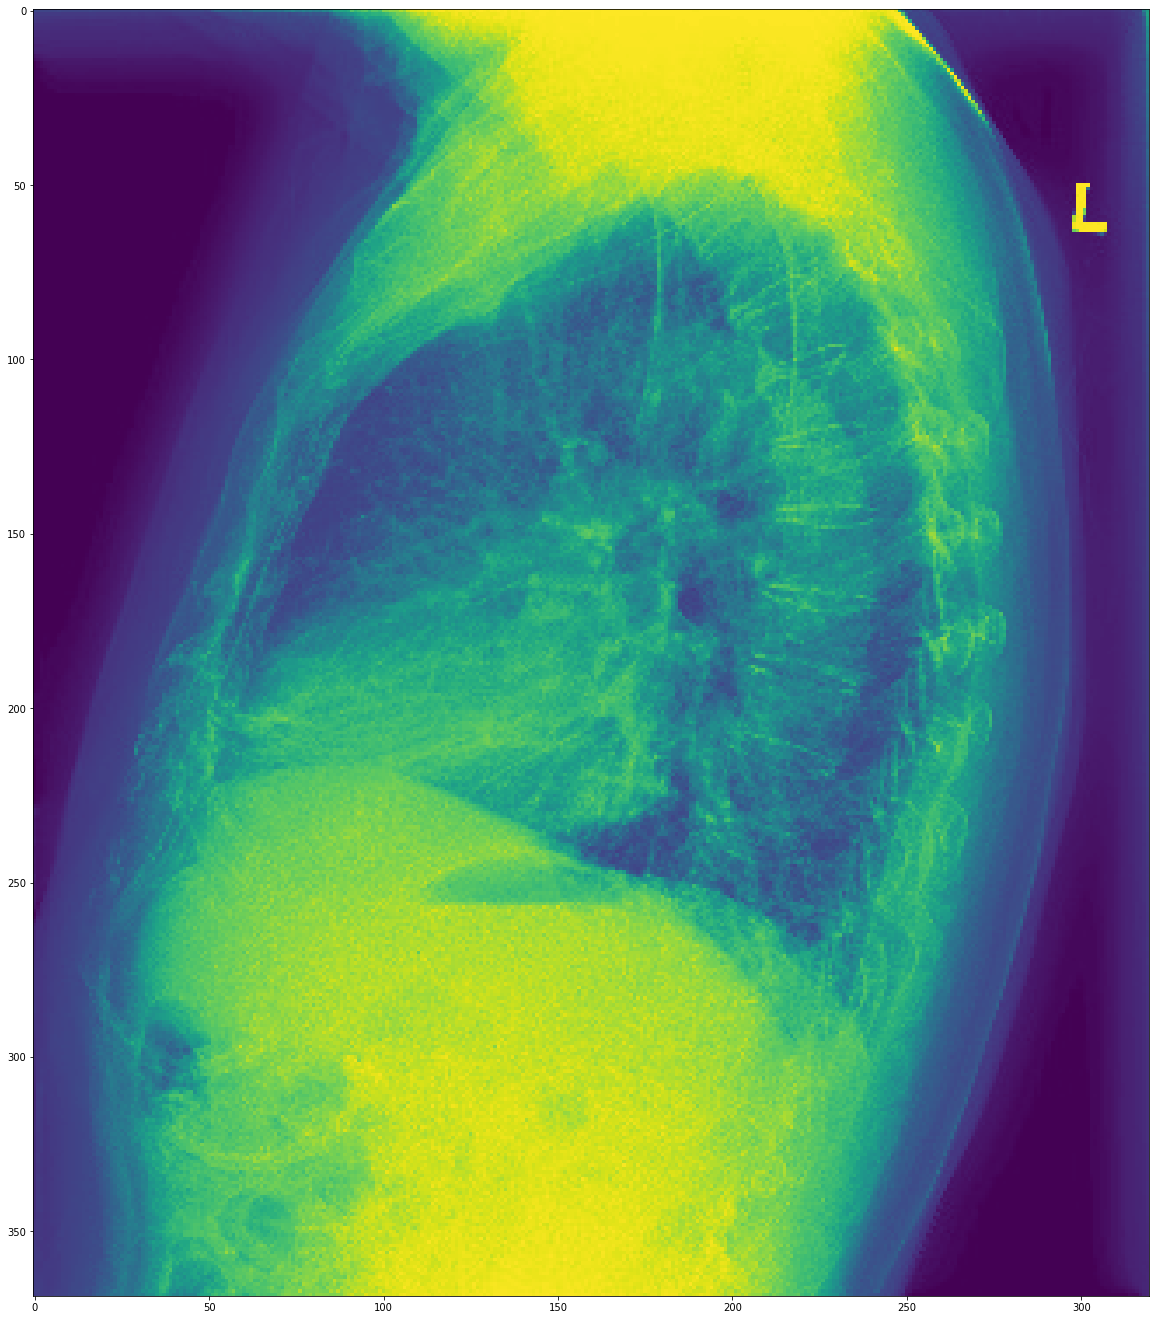

In [19]:
import torch
from torchvision import transforms

plt.imshow(data[17][0].permute(1, 2, 0))
data[17][1]